# 数値解析課題第１３回

### 学籍番号：08B22182　氏名：平山聖輝

課題13

一次元の拡散方程式

$$
\frac{\partial{T}}{\partial{t}} = \alpha \frac{\partial^2{T}}{\partial{x^2}}
$$

に対し，長さ $L = 1$ を $\Delta x = 0.25$ ，時間を $ \Delta t = 0.01$ で分割したときの

$$
T(x_1, t_1), T(x_2, t_1), T(x_3, t_1)
$$

を計算せよ．$(x_i = i \Delta x, t_i = i \Delta t)$ ．ただし， $\alpha = 2$

なお，初期条件は

$$
\begin{align}
T(x_0, t_0) &= 0, \quad T(x_1, t_0) = 200, \quad T(x_2, t_0) = 150 \\
T(x_3, t_0) &= 100, \quad T(x_4, t_0) = 100
\end{align}
$$

であり，境界条件は

$$
T(x_0, t) = 0, \quad T(x_4, t) = 100
$$

とする．

In [380]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from PIL import Image
import time
import matplotlib.animation as animation

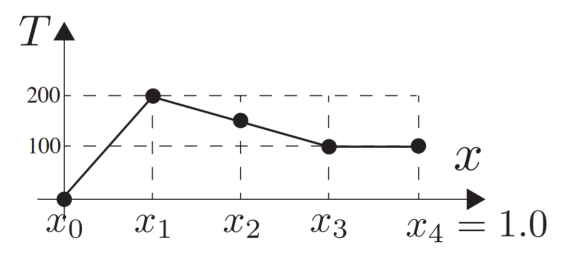

In [381]:
filename = 'image13.png'
img = Image.open(filename)
plt.figure(figsize = (7,7))
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

### 陽解法で解く

$T$ の一次時間偏微分を前進差分近似で近似して元の方程式に代入することを考えると

$$
\begin{align}
\frac{\partial{T}}{\partial{t}} &\approx \frac{T(x_i, t_{n+1}) - T(x_i, t_n)}{\Delta t} \\
\frac{\partial{T}}{\partial{x}} &\approx \frac{T(x_{i+1}, t_n) + T(x_{i-1}, t_n) - 2T(x_i, t_n)}{(\Delta x)^2}
\end{align}
$$

よって以下の更新則を得る．

$$
T(x_i, t_n) = pT(x_{i-1}, t_n) + (1 - 2p)T(x_i, t_n) + pT(x_{i+1}, t_n)
$$

ただし
$$
p = \frac{\alpha \Delta t}{(\Delta x)^2}
$$

In [388]:
alpha = 2
dt = 0.01
dx = 0.25
p = alpha * dt / dx**2
print('p =',p)
T_pos0 = np.array([[0], [200], [150], [100], [100]])
T_array = np.array([[0], [0], [0], [0], [0]])
T_pos_next = np.concatenate([T_pos0, T_array], 1) #np.concateのaxis = 1の使い方確認
display(T_pos0)
display(T_pos_next)
T_pos_next[2][0] #二次配列の要素指定方法の確認

p = 0.32


array([[  0],
       [200],
       [150],
       [100],
       [100]])

array([[  0,   0],
       [200,   0],
       [150,   0],
       [100,   0],
       [100,   0]])

150

In [389]:
def T(x, t, T_array):
    if x == 0:
        return 0
    if x == 4:
        return 100
    else:
        return T_array[x][t]

In [390]:
def calc_T_pos(T_pos0, t_end):
    row = T_pos0.shape[0] #行列の要素数を取得
    col = int(t_end / dt) #計算終了時の時間=t_endで分割数=T_posの列数
    T_vec = np.zeros((5,1))
    T_pos = T_pos0.copy()
    tp1 = time.time()

    for n in range(0, col):
        for i in range(0, row): #T(x=0)とT(x=row-1)は境界条件により決まっている
            if i == 0 or i == row-1:
                T_vec[i] = T(i,n,T_pos)
            else:
                T_vec[i] = p*T(i+1,n,T_pos) + (1-2*p)*T(i,n,T_pos) + p*T(i-1,n,T_pos)
            
        T_pos = np.concatenate([T_pos, T_vec], 1)
    
    tp2 = time.time()
    print('経過時間 = ', tp2 - tp1)
    print('最終温度分布 = ', T_pos[:,col])
    return T_pos

In [391]:
T_pos1 = calc_T_pos(T_pos0, 0.01)

経過時間 =  0.0
最終温度分布 =  [  0. 120. 150. 116. 100.]


T_pos1の計算結果から求める $T(x_1, t_1), \quad T(x_2, t_1), \quad T(x_3, t_1) $ は以下のように求まる．

$$
\begin{align}
T(x_1, t_1) &= 120\\
T(x_2, t_1) &= 150\\
T(x_3, t_1) &= 116
\end{align}
$$

### 陰解法で解く

$T$ の一次時間偏微分を近似する際に前進差分ではなく後退差分を考える解き方を陰解法という

$$
\begin{align}
\frac{\partial{T}}{\partial{t}} &\approx \frac{T(x_i, t_n) - T(x_i, t_{n-1})}{\Delta t} \\
\frac{\partial{T}}{\partial{x}} &\approx \frac{T(x_{i+1}, t_n) + T(x_{i-1}, t_n) - 2T(x_i, t_n)}{(\Delta x)^2}
\end{align}
$$

これをもとの方程式に代入して整理すると，

$$
-pT(x_{i-1}, t_n) + (1 + 2p)T(x_i, t_n) - pT(x_{i+1}, t_n) = T(x_i, t_{n-1})
$$

を得る．これを $i = 1～N $ について計算してみると

$$
\begin{align}
&-pT(x_0, t_{n+1}) + (1 + 2p)T(x_1, t_n) - pT(x_2, t_n) = T(x_1, t_{n-1})\\
&-pT(x_1, t_{n+1}) + (1 + 2p)T(x_2, t_n) - pT(x_3, t_n) = T(x_2, t_{n-1})\\
&... \\
&-pT(x_{N-2}, t_{n+1}) + (1 + 2p)T(x_{N-1}, t_n) - pT(x_N, t_n) = T(x_{N-1}, t_{n-1})
\end{align}
$$

となるので

$$
\left[\begin{array}{ccccccc}
1+2p & -p &  &  &  &  & \\
-p & 1+2p & -p &  &  &  &  \\
 & -p & 1+2p & -p &  &  &  \\
 &  &  &  & \dots &  &  \\
 &  &  &  &  & 1+2p & -p \\
 &  &  &  &  & -p & 1+2p
\end{array}\right]
\left[\begin{array}{c}
T(x_1, t_{n+1}) \\
T(x_2, t_{n+1}) \\
T(x_3, t_{n+1}) \\
\vdots \\
T(x_{N-2}, t_{n+1}) \\
T(x_{N-1}, t_{n+1}) 
\end{array}\right] =
\left[\begin{array}{c}
T(x_1, t_n) \\
T(x_2, t_n) \\
T(x_3, t_n) \\
\vdots \\
T(x_{N-2}, t_n) \\
T(x_{N-1}, t_n) 
\end{array}\right] +
p\left[\begin{array}{c}
T(x_0, t_{n+1}) \\
0\\
0\\
\vdots \\
0\\
T(x_N, t_{n+1})
\end{array}\right]
$$

の行列で書かれた連立一次方程式を解いて $\boldsymbol{T}_{n+1} = [T(x_1, t_{n+1}), T(x_2, t_{n+1}), \dots, T(x_{N-1}, t_{n+1})]^T$ を求めればよい．

In [404]:
T_neg0 = T_pos0.copy()
display(T_neg0)

array([[  0],
       [200],
       [150],
       [100],
       [100]])

In [434]:
def calc_T_neg(T_neg0, t_end):
    row = T_pos0.shape[0] #行列の要素数を取得
    col = int(t_end / dt) #計算終了時の時間=t_endで分割数=T_posの列数
    T_neg = T_neg0.copy()
    tn1 = time.time()
    
    #行列Aを計算する
    shapeA = row - 2
    A = np.zeros((shapeA, shapeA))
    for j in range(0, shapeA):
        if j == 0:
            A[j][j] = 1 + 2*p
            A[j][j+1] = -p
        if j == shapeA-1:
            A[j][j-1] = -p
            A[j][j] = 1 + 2*p
        if j in range(1,shapeA-1):
            A[j][j-1] = -p
            A[j][j] = 1 + 2*p
            A[j][j+1] = -p
    #更新則
    for n in range(0, col):
        #bを作る
        b = np.zeros((shapeA,1))
        for i in range(0, shapeA):
            #b[i-1]はベクトルbのindexが0から始まるから
            if i == 0:
                b[i] = T(i+1,n,T_neg) + p*T(0,n+1,T_neg)
            if i == shapeA-1:
                b[i] = T(i+1,n,T_neg) + p*T(row-1,n+1,T_neg)
            if i in range(1, shapeA-1):
                b[i] = T(i+1,n,T_neg)
    
        #solveで解く
        T_sol = np.linalg.solve(A,b)
        
        #T_vec作る
        T_vec = np.zeros((row,1))
        for k in range(0,row):
            if k == 0 or k == row-1:
                T_vec[k] = T(k,n+1,T_neg)
            else:
                T_vec[k] = T_sol[k-1]
        display(T_vec)
        T_neg = np.concatenate([T_neg,T_vec], 1)

    tn2 = time.time()
    print('経過時間 = ', tn2 - tn1)
    print('最終温度分布 = ', T_neg[:,col])
    return T_neg

In [436]:
T_neg1 = calc_T_neg(T_neg0, 0.01)

array([[ 1.64, -0.32,  0.  ],
       [-0.32,  1.64, -0.32],
       [ 0.  , -0.32,  1.64]])

array([[  0.        ],
       [149.61129521],
       [141.75788796],
       [108.14788058],
       [100.        ]])

経過時間 =  0.00686955451965332
最終温度分布 =  [  0.         149.61129521 141.75788796 108.14788058 100.        ]


### 1秒間の温度分布を計算してみる

経過時間 =  0.010114908218383789
最終温度分布 =  [  0.          25.00000008  50.00000012  75.00000008 100.        ]


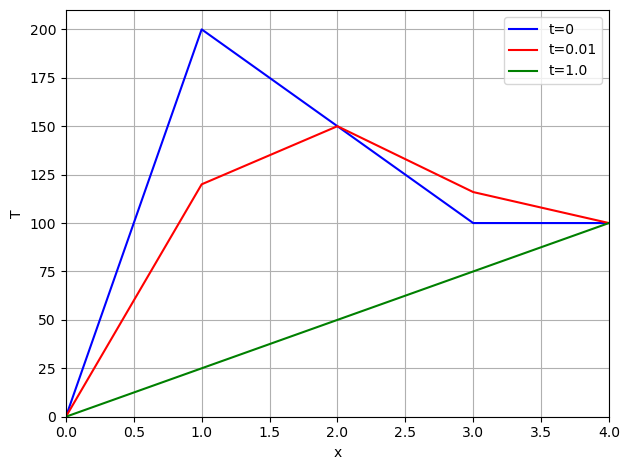

In [408]:
T_pos2 = calc_T_pos(T_pos0, 1)
X = [0, 1, 2, 3, 4]

fig1, ax1 = plt.subplots()
ax1.plot(X, T_pos2.T[0,:], color = 'blue', label = 't=0')
ax1.plot(X, T_pos2.T[1,:], color = 'red', label = 't=0.01')
ax1.plot(X, T_pos2.T[100,:], color = 'green', label = 't=1.0')
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('T')
ax1.set_xlim(0, 4)
ax1.set_ylim(0, 210)

plt.grid('on')
plt.tight_layout()
plt.show()

array([[ 1.64, -0.32, -0.32],
       [-0.32,  1.64, -0.32],
       [ 0.  , -0.32,  1.64]])

経過時間 =  0.0062868595123291016
最終温度分布 =  [  0.         100.0004907  100.0004907  100.00030327 100.        ]


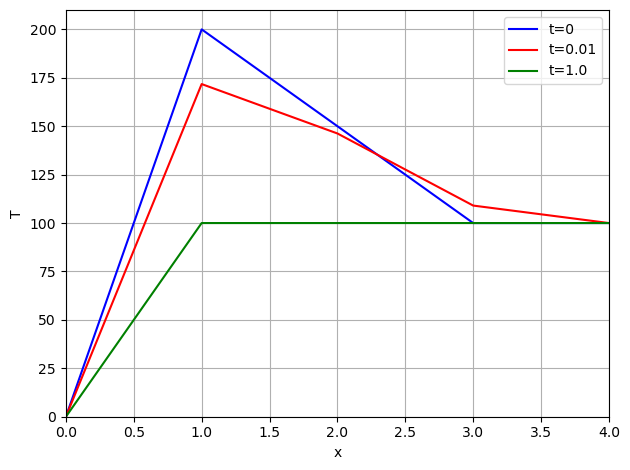

In [409]:
T_neg2 = calc_T_neg(T_neg0, 1)

fig2, ax2 = plt.subplots()
ax2.plot(X, T_neg2.T[0,:], color = 'blue', label = 't=0')
ax2.plot(X, T_neg2.T[1,:], color = 'red', label = 't=0.01')
ax2.plot(X, T_neg2.T[100,:], color = 'green', label = 't=1.0')
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('T')
ax2.set_xlim(0, 4)
ax2.set_ylim(0, 210)

plt.grid('on')
plt.tight_layout()
plt.show()